# OKTAVIAN Chromium benchmark analysis
Add description

In [1]:
import openmc_fusion_benchmarks as ofb
import matplotlib.pyplot as plt
import numpy as np

import helpers

### Extract experimental and codes results from results_database


In [2]:
# read conderc data
experiment_file = ofb.ResultsFromDatabase('experiment.h5', path='results_database')

In [3]:
# read openmc results in results_database/
openmc_endfb80_file = ofb.ResultsFromDatabase('openmc-0-14-0_endfb80.h5', path='results_database')
# openmc_jeff33_file = ofb.ResultsFromDatabase('openmc-0-14-0_jeff33.h5', path='results_database')
openmc_fendl32_file = ofb.ResultsFromDatabase('openmc-0-14-0_fendl32.h5', path='results_database')

In [4]:
# read mcnp results in results_database/
mcnp_endfb80_file = ofb.ResultsFromDatabase('mcnp-6-1-1b_endfb80.h5', path='results_database')
mcnp_jeff33_file = ofb.ResultsFromDatabase('mcnp-6-1-1b_jeff33.h5', path='results_database')
mcnp_jendl40_file = ofb.ResultsFromDatabase('mcnp-6-2-17_jendl40.h5', path='results_database')
mcnp_tendl17_file = ofb.ResultsFromDatabase('mcnp-6-1-1b_tendl17.h5', path='results_database')

### Spectrometers - neutron energy spectra
Neutron energy spectra between 30 keV and 15 MeV measured by the time-of-flight technique using a 14 MeV  D-T neutron generator.

In [5]:
# experiment from results_database/
n21 = experiment_file.get_tally_dataframe('nspectrum')
g41 = experiment_file.get_tally_dataframe('gspectrum')

In [6]:
# openmc from results_database/
openmc_endfb80_n21 = openmc_endfb80_file.get_tally_dataframe('nspectrum')
openmc_endfb80_g41 = openmc_endfb80_file.get_tally_dataframe('gspectrum')

# openmc_jeff33_n21 = openmc_jeff33_file.get_tally_dataframe('nspectrum')
# openmc_jeff33_g41 = openmc_jeff33_file.get_tally_dataframe('gspectrum')

openmc_fendl32_n21 = openmc_fendl32_file.get_tally_dataframe('nspectrum')
openmc_fendl32_g41 = openmc_fendl32_file.get_tally_dataframe('gspectrum')

In [7]:
# mcnp from results_database/
mcnp_endfb80_n21 = mcnp_endfb80_file.get_tally_dataframe('nspectrum')
mcnp_endfb80_g41 = mcnp_endfb80_file.get_tally_dataframe('gspectrum')

mcnp_jeff33_n21 = mcnp_jeff33_file.get_tally_dataframe('nspectrum')
mcnp_jeff33_g41 = mcnp_jeff33_file.get_tally_dataframe('gspectrum')

mcnp_jendl40_n21 = mcnp_jendl40_file.get_tally_dataframe('nspectrum')
mcnp_jendl40_g41 = mcnp_jendl40_file.get_tally_dataframe('gspectrum')

mcnp_tendl17_n21 = mcnp_tendl17_file.get_tally_dataframe('nspectrum')
mcnp_tendl17_g41 = mcnp_tendl17_file.get_tally_dataframe('gspectrum')

In [8]:
ylabel_n = r'Neutron flux $(\frac{n}{cm^2 \cdot src \cdot lethargy})$'
tally_name = 'nspectrum'
xaxis = experiment_file.get_tally_xaxis(tally_name)

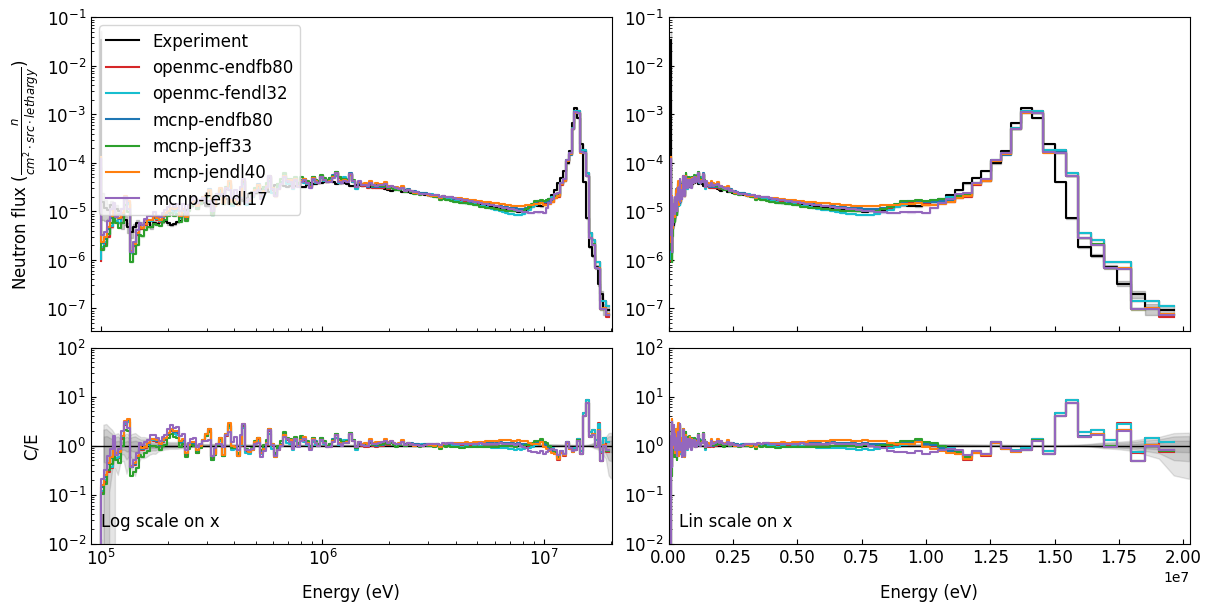

In [9]:
# preprocessing
n21 = ofb.rescale_to_lethargy(n21)
openmc_endfb80_n21 = ofb.rescale_to_lethargy(openmc_endfb80_n21)
# openmc_jeff33_n21 = ofb.rescale_to_lethargy(openmc_jeff33_n21)
openmc_fendl32_n21 = ofb.rescale_to_lethargy(openmc_fendl32_n21)
mcnp_endfb80_n21 = ofb.rescale_to_lethargy(ofb.rebin_spectrum(mcnp_endfb80_n21, n21['energy low [eV]'], n21['energy high [eV]']))
mcnp_jeff33_n21 = ofb.rescale_to_lethargy(ofb.rebin_spectrum(mcnp_jeff33_n21, n21['energy low [eV]'], n21['energy high [eV]']))
mcnp_jendl40_n21 = ofb.rescale_to_lethargy(ofb.rebin_spectrum(mcnp_jendl40_n21, n21['energy low [eV]'], n21['energy high [eV]']))
mcnp_tendl17_n21 = ofb.rescale_to_lethargy(ofb.rebin_spectrum(mcnp_tendl17_n21, n21['energy low [eV]'], n21['energy high [eV]']))

# generate figure
plot = ofb.PlotEnergySpectra(xaxis=xaxis, ylabel=ylabel_n)
plot.add_reference_results(reference_data=n21, label='Experiment')
plot.add_computed_results(computed_data=openmc_endfb80_n21, color='tab:red', alpha=1, label='openmc-endfb80')
# plot.add_computed_results(computed_data=openmc_jeff33_n21, color='tab:brown', alpha=1, label='openmc-jeff33')
plot.add_computed_results(computed_data=openmc_fendl32_n21, color='tab:cyan', alpha=1, label='openmc-fendl32')
plot.add_computed_results(computed_data=mcnp_endfb80_n21, color='tab:blue', alpha=1, label='mcnp-endfb80')
plot.add_computed_results(computed_data=mcnp_jeff33_n21, color='tab:green', alpha=1, label='mcnp-jeff33')
plot.add_computed_results(computed_data=mcnp_jendl40_n21, color='tab:orange', alpha=1, label='mcnp-jendl40')
plot.add_computed_results(computed_data=mcnp_tendl17_n21, color='tab:purple', alpha=1, label='mcnp-tendl17')

### Spectrometers - gamma energy spectra

In [10]:
ylabel_g = r'Gamma flux $(\frac{n}{cm^2 \cdot src \cdot lethargy})$'
tally_name = 'gspectrum'
xaxis = experiment_file.get_tally_xaxis(tally_name)

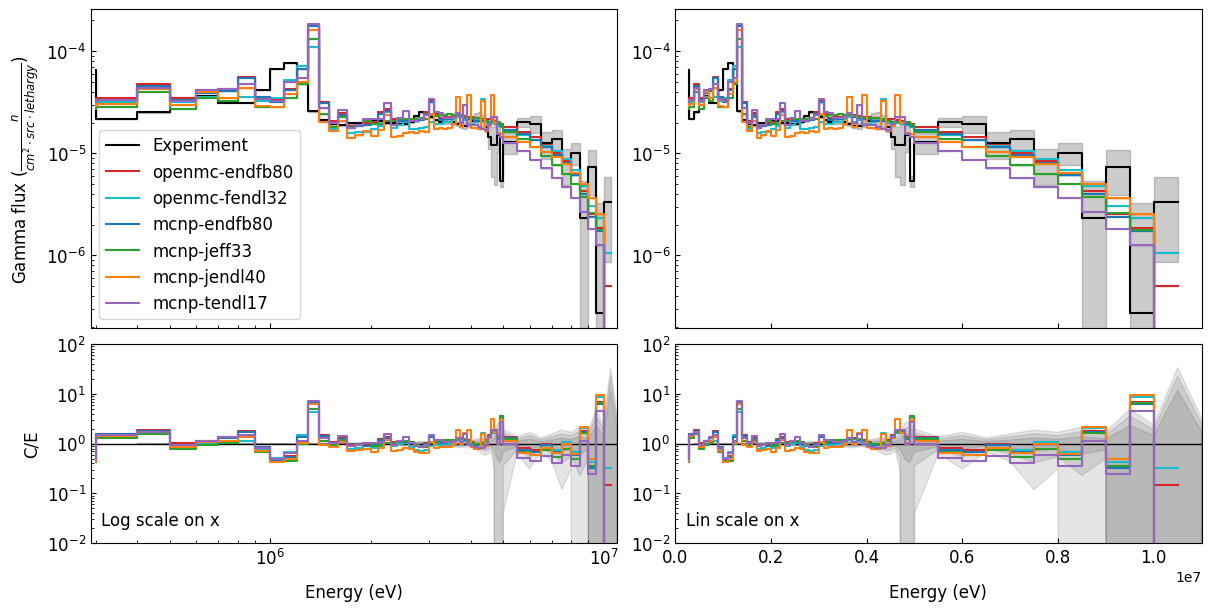

In [11]:
# preprocessing
g41 = ofb.rescale_to_lethargy(g41)
openmc_endfb80_g41 = ofb.rescale_to_lethargy(openmc_endfb80_g41)
# openmc_jeff33_g41 = ofb.rescale_to_lethargy(openmc_jeff33_g41)
openmc_fendl32_g41 = ofb.rescale_to_lethargy(openmc_fendl32_g41)
mcnp_endfb80_g41 = ofb.rescale_to_lethargy(ofb.rebin_spectrum(mcnp_endfb80_g41, g41['energy low [eV]'], g41['energy high [eV]']))
mcnp_jeff33_g41 = ofb.rescale_to_lethargy(ofb.rebin_spectrum(mcnp_jeff33_g41, g41['energy low [eV]'], g41['energy high [eV]']))
mcnp_jendl40_g41 = ofb.rescale_to_lethargy(ofb.rebin_spectrum(mcnp_jendl40_g41, g41['energy low [eV]'], g41['energy high [eV]']))
mcnp_tendl17_g41 = ofb.rescale_to_lethargy(ofb.rebin_spectrum(mcnp_tendl17_g41, g41['energy low [eV]'], g41['energy high [eV]']))

# generate figure
plot = ofb.PlotEnergySpectra(xaxis=xaxis, ylabel=ylabel_g)
plot.add_reference_results(reference_data=g41, label='Experiment')
plot.add_computed_results(computed_data=openmc_endfb80_g41, color='tab:red', alpha=1, label='openmc-endfb80')
# plot.add_computed_results(computed_data=openmc_jeff33_g41, color='tab:brown', alpha=1, label='openmc-jeff33')
plot.add_computed_results(computed_data=openmc_fendl32_g41, color='tab:cyan', alpha=1, label='openmc-fendl32')
plot.add_computed_results(computed_data=mcnp_endfb80_g41, color='tab:blue', alpha=1, label='mcnp-endfb80')
plot.add_computed_results(computed_data=mcnp_jeff33_g41, color='tab:green', alpha=1, label='mcnp-jeff33')
plot.add_computed_results(computed_data=mcnp_jendl40_g41, color='tab:orange', alpha=1, label='mcnp-jendl40')
plot.add_computed_results(computed_data=mcnp_tendl17_g41, color='tab:purple', alpha=1, label='mcnp-tendl17')

### References
Add references